# ==============================================================
# Explore EuroSAT-LS Test Split Embeddings with t-SNE
# ==============================================================

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.manifold import TSNE

In [2]:
classes = ['AnnualCrop', 'Forest', 'HerbaceousVegetation', 'Highway', 'Industrial', 'Pasture', 'PermanentCrop', 'Residential', 'River', 'SeaLake']

In [ ]:

npz_path_test = "/mnt/storage/data/eurosat-l/x_y_test_geomoemae_S_embed_pos_500epochs.npz" 
test_embeddings = np.load(npz_path_test)

In [4]:
x_test, y_test= (
    test_embeddings["x_test"],
    test_embeddings["y_test"])

In [5]:
cls_token = x_test[:, 576:720]
labels = np.argmax(y_test, axis=1)
print (cls_token.shape)
print (x_test.shape)
print (labels.shape)

(5400, 144)
(5400, 15120)
(5400,)


In [6]:
other_tokens = x_test[:, 720:]

In [7]:
tsne = TSNE(n_components=2, random_state=42, perplexity=30)
emb_2d = tsne.fit_transform(x_test)

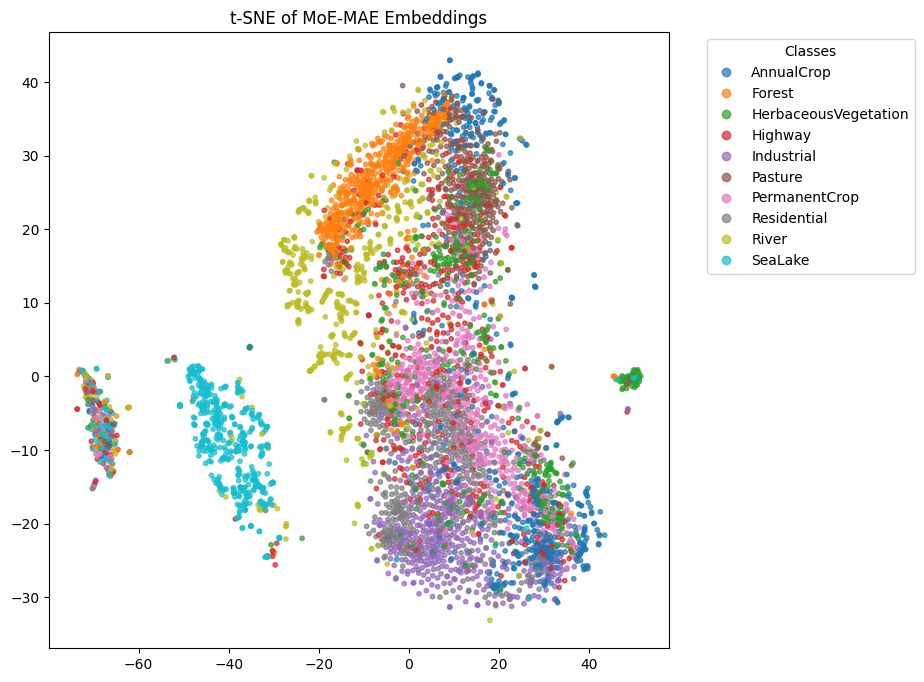

In [8]:
plt.figure(figsize=(8, 8))
scatter = plt.scatter(
    emb_2d[:, 0], 
    emb_2d[:, 1], 
    c=labels, 
    cmap="tab10", 
    s=10, 
    alpha=0.7
)
plt.title("t-SNE of MoE-MAE Embeddings")

# build legend
handles, cls_labels = scatter.legend_elements(num=len(classes))
plt.legend(
    handles, classes, 
    title="Classes", 
    bbox_to_anchor=(1.05, 1), loc="upper left"
)

plt.show()

In [9]:
tsne = TSNE(n_components=2, random_state=42, perplexity=30)
emb_2d_cls = tsne.fit_transform(cls_token)

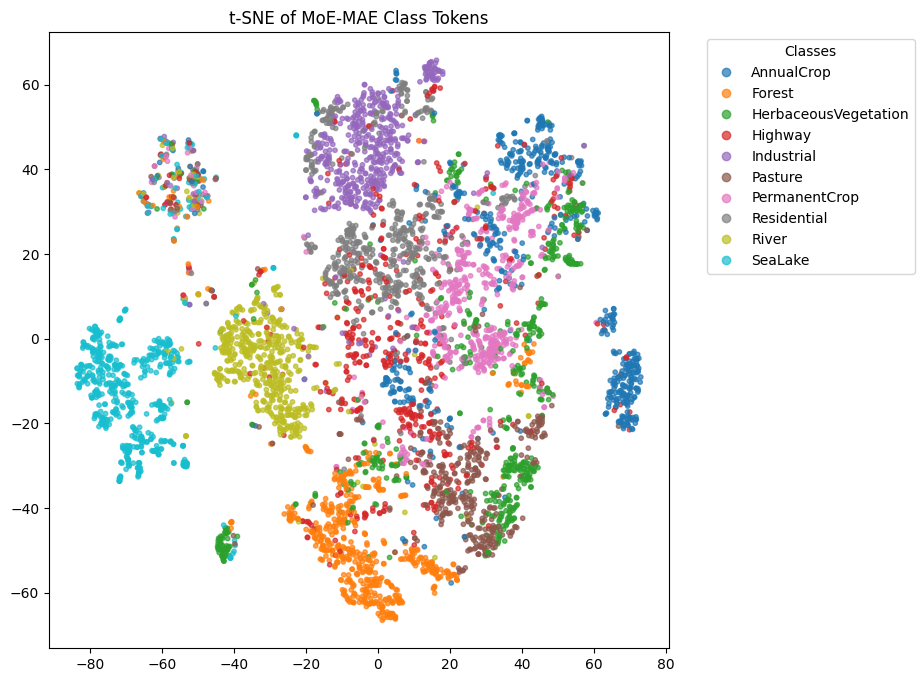

In [10]:
plt.figure(figsize=(8, 8))
scatter = plt.scatter(
    emb_2d_cls[:, 0], 
    emb_2d_cls[:, 1], 
    c=labels, 
    cmap="tab10", 
    s=10, 
    alpha=0.7
)
plt.title("t-SNE of MoE-MAE Class Tokens")

# build legend
handles, cls_labels = scatter.legend_elements(num=len(classes))
plt.legend(
    handles, classes, 
    title="Classes", 
    bbox_to_anchor=(1.05, 1), loc="upper left"
)

plt.show()

In [11]:
tsne = TSNE(n_components=2, random_state=42, perplexity=30)
emb_2d_other = tsne.fit_transform(other_tokens)

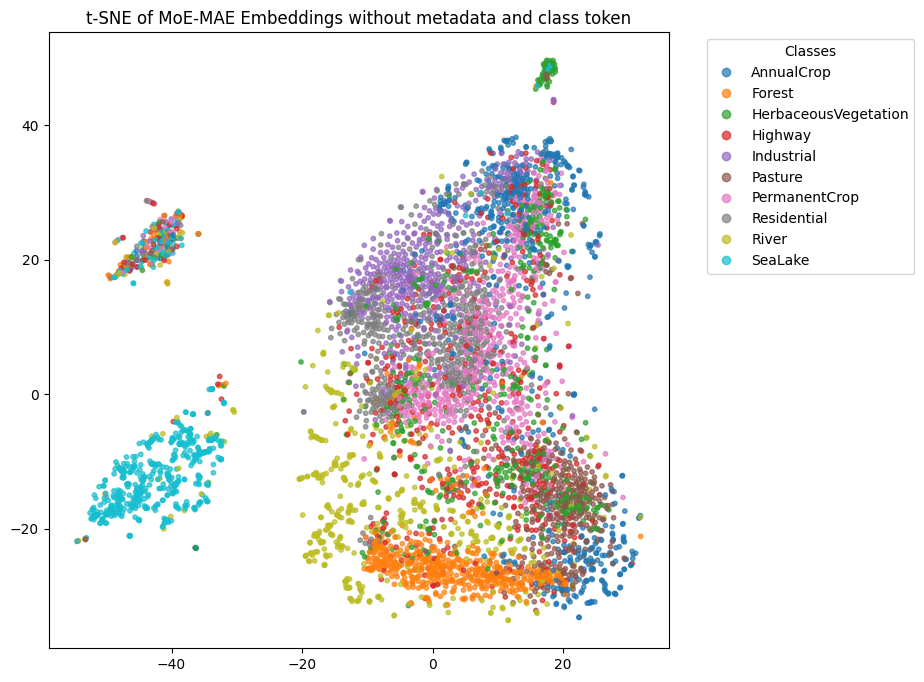

In [ ]:
plt.figure(figsize=(8, 8))
scatter = plt.scatter(
    emb_2d_other[:, 0], 
    emb_2d_other[:, 1], 
    c=labels, 
    cmap="tab10", 
    s=10, 
    alpha=0.7
)
plt.title("t-SNE of MoE-MAE Embeddings without metadata and class token")

handles, cls_labels = scatter.legend_elements(num=len(classes))
plt.legend(
    handles, classes, 
    title="Classes", 
    bbox_to_anchor=(1.05, 1), loc="upper left"
)

plt.show()